In [10]:
import sys

sys.path.append("../libs")


CONFIG = {
    "model_path": "../data/model/model_calibrated.joblib",
    "features_path": '../data/model/baseline_features_list.json'
}

## Load Model

In [11]:
import joblib

model = joblib.load(CONFIG["model_path"])

In [12]:
import json

with open(CONFIG["features_path"], 'r') as f:
    features = json.load(f)
features

['funded_amnt',
 'term',
 'installment',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl'

## Predict

In [13]:
import pandas as pd


df  = pd.read_parquet('../data/lending_club_case_case_test_dataset.parquet')

In [14]:
df['time_of_banking_days'] = (df['issue_d'] - df['earliest_cr_line']).dt.days
df['time_of_banking_months'] = (df['issue_d'].dt.year - df['earliest_cr_line'].dt.year) * 12 + (df['issue_d'].dt.month - df['earliest_cr_line'].dt.month)

In [15]:
cat_features = [
    "emp_length",
    "home_ownership",
    "verification_status",
    "purpose",
    "addr_state",
    "application_type",
]

In [16]:
X = df[features]

In [17]:
X[cat_features] = X[cat_features].astype(str).fillna('missing')


/var/folders/tc/7v_6yrg96fgdxwydpsmdqhz40000gn/T/ipykernel_5851/1685576383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_features] = X[cat_features].astype(str).fillna('missing')


In [41]:
df["default_prob"] = model.predict_proba(X)[:, 1]
df["default"] = model.predict(X)

<Axes: >

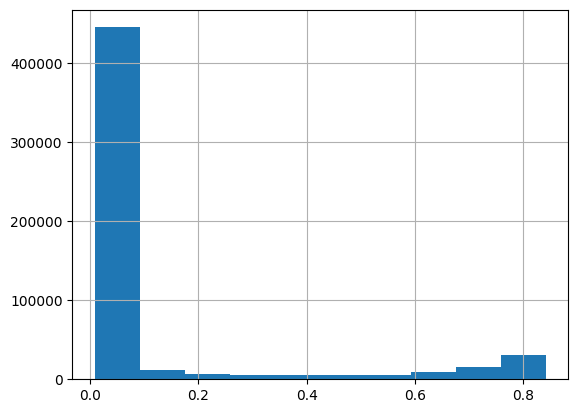

In [63]:
df["default_prob"].hist()